<a href="https://colab.research.google.com/github/LeTrungDunggg/Assignment/blob/main/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import scale,StandardScaler
from tensorflow.keras import layers

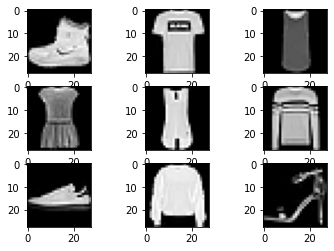

In [ ]:
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()
for i in range (9):
  plt.subplot(330+i+1) 
  plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)


In [ ]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=20)])

Epoch 1/500
375/375 [==============================] - 9s 21ms/step - loss: 0.5837 - accuracy: 0.7885 - val_loss: 0.4368 - val_accuracy: 0.8387
Epoch 2/500
375/375 [==============================] - 8s 20ms/step - loss: 0.3992 - accuracy: 0.8538 - val_loss: 0.3900 - val_accuracy: 0.8652
Epoch 3/500
375/375 [==============================] - 8s 20ms/step - loss: 0.3568 - accuracy: 0.8688 - val_loss: 0.3878 - val_accuracy: 0.8595
Epoch 4/500
375/375 [==============================] - 8s 21ms/step - loss: 0.3317 - accuracy: 0.8785 - val_loss: 0.3831 - val_accuracy: 0.8646
Epoch 5/500
375/375 [==============================] - 8s 20ms/step - loss: 0.3160 - accuracy: 0.8834 - val_loss: 0.3978 - val_accuracy: 0.8665
Epoch 6/500
375/375 [==============================] - 8s 20ms/step - loss: 0.3036 - accuracy: 0.8884 - val_loss: 0.3542 - val_accuracy: 0.8845
Epoch 7/500
375/375 [==============================] - 8s 21ms/step - loss: 0.2931 - accuracy: 0.8930 - val_loss: 0.3277 - val_accuracy:

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test_loss',score[0])
print('Test accuracy',score[1])

Test_loss 0.5408192873001099
Test accuracy 0.8899000287055969


In [ ]:
y_pred = model.predict(x_test)
print(y_pred.flatten)
print(y_test)


<built-in method flatten of numpy.ndarray object at 0x7f6128756090>
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


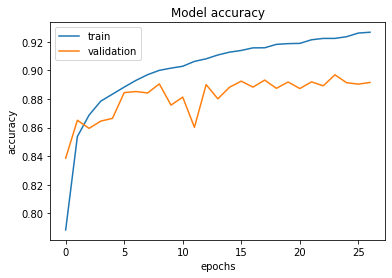

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()